In [1]:
# 导入相关包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from matplotlib.ticker import MultipleLocator
from sklearn import datasets, ensemble
#from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
shap.initjs()

In [2]:

#Train
raw_data = pd.read_csv(open(r'\单台震中距预测\时间窗\0.2s\RF\20个训练特征.csv',encoding='UTF-8'))
X_train = raw_data.iloc[:, 0:20].values
y_train = raw_data.iloc[:, 20].values    #导入数据  iloc通过行号获取行数据
#print("X",X)
#print("y",y)
#print("X",len(X))  

#Test
raw_data1 = pd.read_csv(open(r'\单台震中距预测\时间窗\0.2s\RF\20个测试特征.csv',encoding='UTF-8'))
X_test = raw_data1.iloc[:, 0:20].values
y_test = raw_data1.iloc[:, 20].values    #导入数据  iloc通过行号获取行数据


In [4]:
#网格搜索最佳参数
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(RandomForestRegressor(),\
                    param_grid={"n_estimators":np.arange(10,160,10),\
                                "max_depth": np.arange(5,50,5),\
                               })

grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"
     % (grid.best_params_, grid.best_score_))

The best parameters are {'max_depth': 40, 'n_estimators': 140} with a score of 0.59


In [3]:
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
n_folds = 6  # 设置交叉检验的次数
cv_score_list = []  # 交叉检验结果列表
model_names = ['RF']  # 不同模型的名称列表

# 定义模型参数进行训练
#params = {
#    "n_estimators": 500,
#    "max_depth": 6,
#    "min_samples_leaf": 3,
#    "learning_rate": 0.01,
#}
model_rf = RandomForestRegressor(n_estimators=140,max_depth=40,random_state=30)
scores = cross_val_score(model_rf, X_train, y_train, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
cv_score_list.append(scores)  # 将交叉检验结果存入结果列表

model_rf.fit(X_train, y_train)





train_prediction=model_rf.predict(X_train)
print(model_rf)

# 模型效果指标评估
n_samples, n_features = X_train.shape  # 总样本量506,总特征数13
#print(n_samples, n_features)
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(1):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y_train, train_prediction)  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('cross validation result:')  # 打印输出标题
print (df1)  # 打印输出交叉检验的数据框
print (70 * '-')  # 打印分隔线
print ('regression metrics:')  # 打印输出标题
print (df2)  # 打印输出回归指标的数据框
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ev \t explained_variance')
print ('mae \t mean_absolute_error')
print ('mse \t mean_squared_error')
print ('r2 \t r2')
print (70 * '-')  # 打印分隔线


print("训练标准差=",np.std(y_train-train_prediction))
print("训练误差均值=",np.mean(y_train-train_prediction))
print("训练平均绝对误差=",np.mean(abs(y_train-train_prediction)))

#测试
test_prediction=model_rf.predict(X_test)

from sklearn import metrics
from sklearn.metrics import r2_score
print(len(y_test-test_prediction))
print("测试标准差=",np.std(y_test-test_prediction))
print("测试误差均值=",np.mean(y_test-test_prediction))
print("测试平均绝对误差=",np.mean(abs(y_test-test_prediction)))

print("测试平均绝对误差MAE=",metrics.mean_absolute_error(test_prediction, y_test))
print("测试RMSE=",metrics.mean_squared_error(test_prediction, y_test)**0.5)
print("测试r2 score:", r2_score(y_test, test_prediction))


RandomForestRegressor(max_depth=40, n_estimators=140, random_state=30)
samples: 13353 	 features: 20
----------------------------------------------------------------------
cross validation result:
           0         1         2         3         4         5
RF  0.644764  0.536524  0.594441  0.281347  0.484976  0.623187
----------------------------------------------------------------------
regression metrics:
          ev       mae        mse        r2
RF  0.943337  4.734256  37.947749  0.943324
----------------------------------------------------------------------
short name 	 full name
ev 	 explained_variance
mae 	 mean_absolute_error
mse 	 mean_squared_error
r2 	 r2
----------------------------------------------------------------------
训练标准差= 6.1594670789853145
训练误差均值= -0.0933482465078492
训练平均绝对误差= 4.734255542937889
3637
测试标准差= 16.221736607499242
测试误差均值= 0.60621493330357
测试平均绝对误差= 12.410013897132332
测试平均绝对误差MAE= 12.410013897132332
测试RMSE= 16.233059942858624
测试r2 score: 0.6067187280

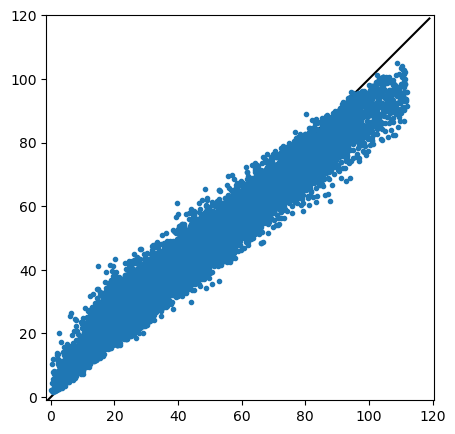

In [4]:
#训练结果
plt.figure(figsize=(5, 5))
plt.axis('equal')
#y_train-pre_y_list[3]
x3 = np.arange(-1, 120, 1)
y3=x3
plt.plot(x3, y3, "black")

plt.plot(y_train,train_prediction,'.')
plt.xlim(-1, 120)
plt.ylim(-1, 120)
plt.show()

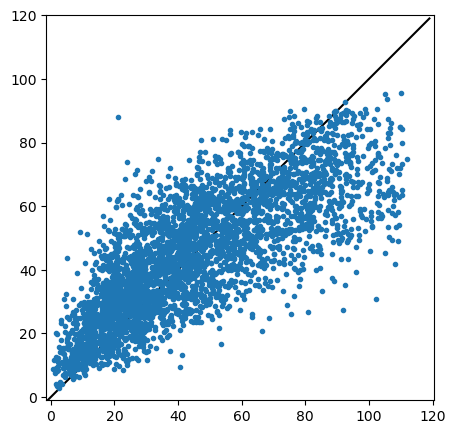

测试r2 score: 0.6067187280400532
测试平均绝对误差= 12.410013897132332


In [6]:
#测试结果
plt.figure(figsize=(5, 5))
plt.axis('equal')
#y_test-data
x3 = np.arange(-1, 120, 1)
y3=x3
plt.plot(x3, y3, "black")

plt.plot(y_test,test_prediction,'.')
plt.xlim(-1, 120)
plt.ylim(-1, 120)
plt.show()

from sklearn.metrics import r2_score
print("测试r2 score:", r2_score(y_test, test_prediction))  #16.38  0.58
print("测试平均绝对误差=",np.mean(abs(y_test-test_prediction)))